In [6]:
import numpy 
import scipy
from scipy.signal import find_peaks
import itertools, sys, os, copy, pickle
sys.path.append('/mnt/home/szheng/projects/util_code')



import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import plot_raster as pr
from importlib import reload
import matplotlib.pyplot as plt
import pandas as pd
# from tqdm import tqdm
from tqdm.notebook import tqdm
import jax
import jax.numpy as np
import jax.scipy as scipy
from jax import value_and_grad, grad, jit, vmap, jacfwd, jacrev
from jax.example_libraries import optimizers as jax_opt

import gm
import gm_plot as gp
import gm_plot_diagnostic as gpd
import seaborn as sns
%matplotlib inline

In [5]:
sess_name="e15_13f1_220117"
py_data_dir = "/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data"
fr_map_ = pickle.load(open(os.path.join(py_data_dir,'fr_map.p'),'rb'))

# %%
fr_map=fr_map_['fr_map']
fr_map_trial=fr_map_['fr_map_trial']

args=pr.preprocess_for_plot(sess_name,sigma=30,speedmask=5,n_pos_bins=100)
section_colordict,spk_triggered_positions_trial_all_speedmasked,pos_bins_dict,choice = args[4:8]
bin_to_lin=copy.copy(pos_bins_dict['lin'])
bin_to_lin=np.concatenate([bin_to_lin[:-1,None],bin_to_lin[1:,None]],axis=1).mean(axis=1)

ind = 0
uid_l = fr_map[0].index
uid = uid_l[ind] # 1 indexed
uid_num = int(uid.split('_')[1])-1 # 0 indexed

ch=0
trial_mask = choice==ch

spk_triggered_positions_trial_one_unit = spk_triggered_positions_trial_all_speedmasked[uid_num]
spk_triggered_positions_trial  = spk_triggered_positions_trial_one_unit[trial_mask]


2022-06-08 10:11:16.954166: E external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


# CV

In [3]:
reload(gm)
ys_l = fr_map_trial[0][0]

# visualize the mask

In [16]:
mask = gm.get_train_test_mask(ys_l.shape[0],ys_l.shape[1],0.1)

In [4]:
import gm_plot_diagnostic as gpd
reload(gpd)

<module 'gm_plot_diagnostic' from '/mnt/home/szheng/projects/util_code/gm_plot_diagnostic.py'>

In [77]:
reload(gp)

<module 'gm_plot' from '/mnt/home/szheng/projects/util_code/gm_plot.py'>

In [ ]:
# original fit; masked out fit

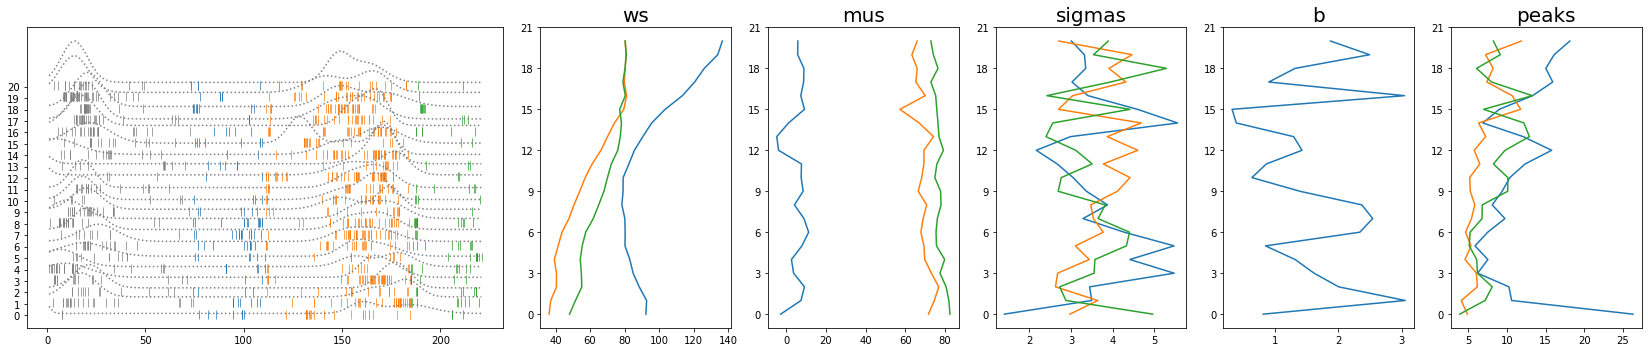

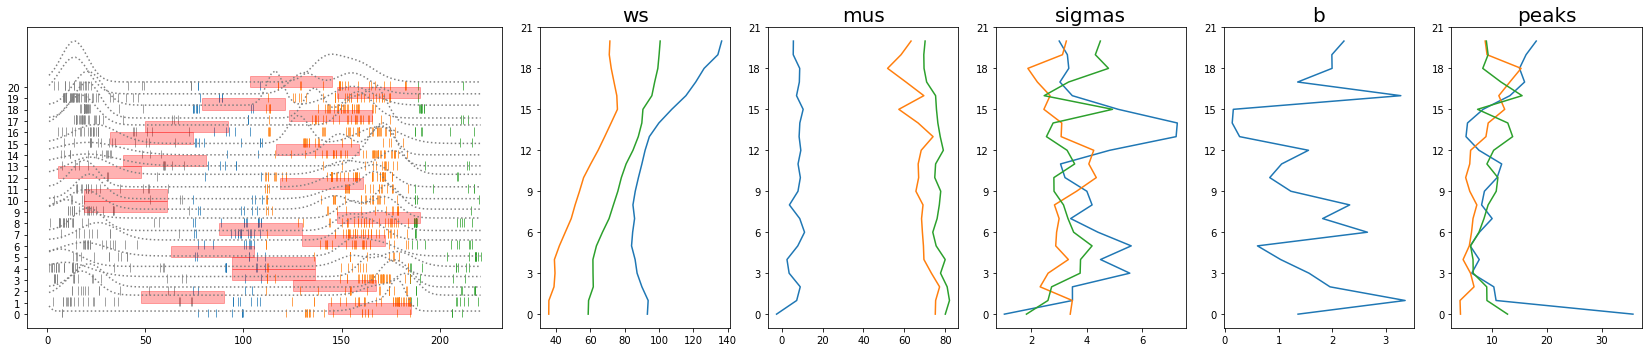

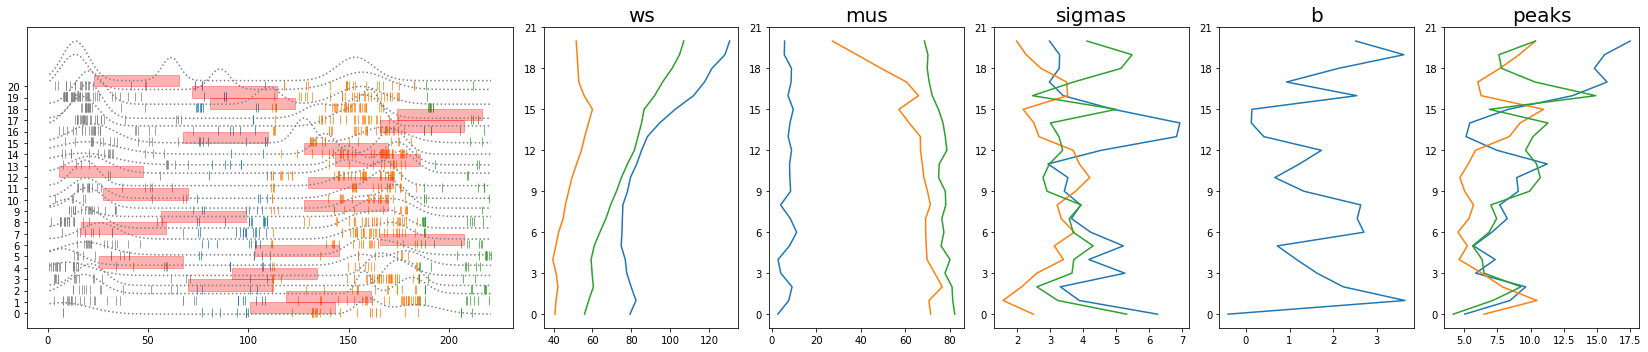

In [35]:
reload(gp)
reload(gm)
nfields = 3
ys_l = fr_map_trial[0][0]

# fig,axs=plt.subplots(1,2,figsize=(10,5))
displacement=5
reg_pars_ = {'g_sigma':10,'g_mu':50,'g_w':100}

pars_learned,loss_l=gm.fit(ys_l,regressors_={},reg_type = 'quad_variation',reg_pars_=reg_pars_,nfields=nfields,mask=None,loss_type='mse')
fig,ax=gp.plot_fit_original_raster_param_1trial(fr_map_trial,ind,choice,spk_triggered_positions_trial,fig=None,axs=None,pars_learned=pars_learned,ch=0,gm_fit_dir=None,nooriginal=True,figsize=(23,5),bin_to_lin=bin_to_lin,nparams=5,displacement=displacement)

mask_ratio = 0.2

for ii in range(2):
    mask = gm.get_train_test_mask(ys_l.shape[0],ys_l.shape[1],mask_ratio)
    pars_learned,loss_l=gm.fit(ys_l,regressors_={},reg_type = 'quad_variation',reg_pars_=reg_pars_,nfields=nfields,mask=mask,loss_type='mse')
    fig,axs=gp.plot_fit_original_raster_param_1trial(fr_map_trial,ind,choice,spk_triggered_positions_trial,fig=None,axs=None,pars_learned=pars_learned,ch=0,gm_fit_dir=None,nooriginal=True,figsize=(23,5),bin_to_lin=bin_to_lin,nparams=5,displacement=displacement)
    fig,axs[0]=gpd.plot_masks(mask,displacement,xs=None,fig=fig,ax=axs[0],bin_to_lin=bin_to_lin)






In [51]:
reload(gp)
reload(gm)
nfields = 3
ys_l = fr_map_trial[0][0]

# fig,axs=plt.subplots(1,2,figsize=(10,5))
displacement=5
# reg_pars_ = {'g_sigma':10,'g_mu':50,'g_w':100}
# reg_pars_ = {'g_sigma':10,'g_mu':50,'g_w':10}
reg_pars_ = {'g_sigma':0.5,'g_mu':2.5,'g_w':0.5}
reg_pars = gm.get_reg_pars(reg_pars_=reg_pars_)

pars_learned_dict = {}
loss_l_dict = {}
reg_dict={}
for nfields in tqdm([1,2,3,4,5]):
    pars_learned,loss_l=gm.fit(ys_l,regressors_={},reg_type = 'quad_variation',reg_pars_=reg_pars_,nfields=nfields,mask=None,loss_type='mse')
    pars_learned_dict[nfields] = pars_learned

    loss_l_dict[nfields] = loss_l

    reg_dict[nfields]=    gm.regularization(gm.get_regressor(),pars_learned,reg_pars,reg_type='quad_variation',mask=None)


  0%|          | 0/5 [00:00<?, ?it/s]

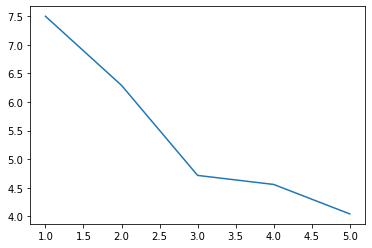

In [52]:
plt.plot(loss_l_dict.keys(),[ll[-1] for ll in loss_l_dict.values()])

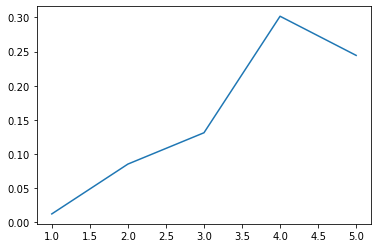

In [53]:
plt.plot(reg_dict.keys(),reg_dict.values())

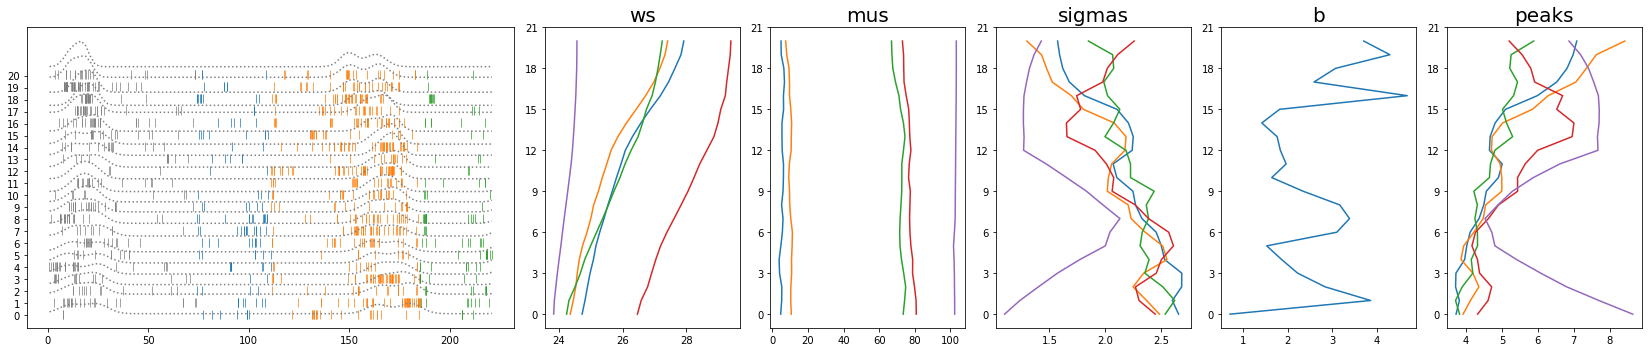

In [54]:

fig,ax=gp.plot_fit_original_raster_param_1trial(fr_map_trial,ind,choice,spk_triggered_positions_trial,fig=None,axs=None,pars_learned=pars_learned,ch=0,gm_fit_dir=None,nooriginal=True,figsize=(23,5),bin_to_lin=bin_to_lin,nparams=5,displacement=displacement)

In [70]:
expand_cv_param_grid({'g_sigma':1},g_mu=[0,1,2],g_w=[1,2,3])

[{'g_sigma': 1, 'g_mu': 0, 'g_w': 1},
 {'g_sigma': 1, 'g_mu': 0, 'g_w': 2},
 {'g_sigma': 1, 'g_mu': 0, 'g_w': 3},
 {'g_sigma': 1, 'g_mu': 1, 'g_w': 1},
 {'g_sigma': 1, 'g_mu': 1, 'g_w': 2},
 {'g_sigma': 1, 'g_mu': 1, 'g_w': 3},
 {'g_sigma': 1, 'g_mu': 2, 'g_w': 1},
 {'g_sigma': 1, 'g_mu': 2, 'g_w': 2},
 {'g_sigma': 1, 'g_mu': 2, 'g_w': 3}]

# whether masked cv can help with hyperparm selection

In [6]:

cv_fold = 200
# nfields = 3

ys_l = fr_map_trial[0][0]

displacement=5
reg_pars_ = {'g_sigma':10,'g_mu':50,'g_w':100}
# reg_pars_l = gm.expand_cv_param_grid(reg_pars_,g_w=[0.1,1,10,100,1000])
reg_pars_l = gm.expand_cv_param_grid(reg_pars_,nfields=[2])
mask_ratio = 0.1

test_loss_l=[]

for ii,cc in enumerate(range(cv_fold)):
    print(cc)
    mask = gm.get_train_test_mask(ys_l.shape[0],ys_l.shape[1],mask_ratio)
    test_loss_l.append([])
    for rp_ in reg_pars_l:
        print(rp_)
        nfields=rp_['nfields']
        pars_learned,loss_l,test_loss=gm.train_and_test(ys_l,regressors_={},reg_type = 'quad_variation',reg_pars_=rp_,nfields=nfields,mask=mask,loss_type='mse')
#     fig,ax=gp.plot_fit_original_raster_param_1trial(fr_map_trial,ind,choice,spk_triggered_positions_trial,fig=None,axs=None,pars_learned=pars_learned,ch=0,gm_fit_dir=None,nooriginal=True,figsize=(23,5),bin_to_lin=bin_to_lin,nparams=5,displacement=displacement)
        test_loss_l[ii].append(test_loss)
    








0
{'g_sigma': 10, 'g_mu': 50, 'g_w': 100, 'nfields': 2}
1
{'g_sigma': 10, 'g_mu': 50, 'g_w': 100, 'nfields': 2}
2
{'g_sigma': 10, 'g_mu': 50, 'g_w': 100, 'nfields': 2}
3
{'g_sigma': 10, 'g_mu': 50, 'g_w': 100, 'nfields': 2}
4
{'g_sigma': 10, 'g_mu': 50, 'g_w': 100, 'nfields': 2}


KeyboardInterrupt: 

In [9]:
reg_pars_and_loss_df=[]
for tll,rll in zip(test_loss_l,train_loss_l):
    reg_pars_df=pd.DataFrame(reg_pars_l)
    reg_pars_df['test_loss'] = numpy.array(tll)
    reg_pars_df['train_loss']=numpy.array(rll)
    reg_pars_and_loss_df.append(reg_pars_df)
reg_pars_and_loss_df=pd.concat(reg_pars_and_loss_df,ignore_index=True)



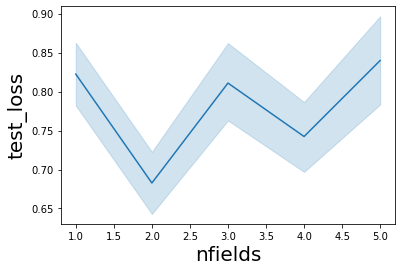

In [10]:
import seaborn as sns
g=sns.lineplot(x='nfields',y='test_loss',data=reg_pars_and_loss_df)
# g.set(xscale='log')

# fit resultm with different g_w 

In [45]:
reload(gm)
cv_fold = 10
# nfields = 3

ys_l = fr_map_trial[0][0]

displacement=5
reg_pars_ = {'g_sigma':10,'g_mu':50,'g_w':100,'nfields':3}
reg_pars_l = gm.expand_cv_param_grid(reg_pars_,g_w=[1000000],nfields=[2,3,4],g_mu=[0.1,1,100,10000],g_sigma=[1,100,10000])
# reg_pars_l = gm.expand_cv_param_grid(reg_pars_,nfields=[1,2,3,4,5])
mask_ratio = 0.2
niters = 50
test_loss_l=[]
train_loss_l=[]
regressors=gm.get_regressor()
pars_learned_l=[]
for ii,cc in enumerate(range(cv_fold)):
    print(cc)
#     mask_ratio = reg_pars_l['mask_ratio']
    mask = gm.get_train_test_mask(ys_l.shape[0],ys_l.shape[1],mask_ratio)
    test_loss_l.append([])
    train_loss_l.append([])
    pars_learned_l.append([])
    for rp_ in reg_pars_l:
        print(rp_)
#         mask_ratio = rp_['mask_ratio']
#         mask = gm.get_train_test_mask(ys_l.shape[0],ys_l.shape[1],mask_ratio)
        nfields=rp_['nfields']
        pars_learned,loss_l,test_loss=gm.train_and_test(ys_l,regressors_={},reg_type = 'quad_variation',reg_pars_=rp_,nfields=nfields,mask=mask,loss_type='mse',niters=niters)
#     fig,ax=gp.plot_fit_original_raster_param_1trial(fr_map_trial,ind,choice,spk_triggered_positions_trial,fig=None,axs=None,pars_learned=pars_learned,ch=0,gm_fit_dir=None,nooriginal=True,figsize=(23,5),bin_to_lin=bin_to_lin,nparams=5,displacement=displacement)
        
        train_loss_no_reg = gm.loss_no_reg(regressors,pars_learned,ys_l,loss_type='mse',mask=mask)

        test_loss_l[ii].append(test_loss)
        train_loss_l[ii].append(train_loss_no_reg)
        pars_learned_l[ii].append(pars_learned)
#         fig,ax=gp.plot_fit_original_raster_param_1trial(fr_map_trial,ind,choice,spk_triggered_positions_trial,fig=None,axs=None,pars_learned=pars_learned,ch=0,gm_fit_dir=None,nooriginal=True,figsize=(23,5),bin_to_lin=bin_to_lin,nparams=5,displacement=displacement)
#         fig,ax[0]=gpd.plot_masks(mask,displacement,xs=None,fig=fig,ax=ax[0],bin_to_lin=bin_to_lin)
#         ax[1].set_xlim([20,150])






0
{'g_sigma': 1, 'g_mu': 0.1, 'g_w': 1000000, 'nfields': 2}
{'g_sigma': 100, 'g_mu': 0.1, 'g_w': 1000000, 'nfields': 2}
{'g_sigma': 10000, 'g_mu': 0.1, 'g_w': 1000000, 'nfields': 2}
{'g_sigma': 1, 'g_mu': 1, 'g_w': 1000000, 'nfields': 2}
{'g_sigma': 100, 'g_mu': 1, 'g_w': 1000000, 'nfields': 2}
{'g_sigma': 10000, 'g_mu': 1, 'g_w': 1000000, 'nfields': 2}
{'g_sigma': 1, 'g_mu': 100, 'g_w': 1000000, 'nfields': 2}
{'g_sigma': 100, 'g_mu': 100, 'g_w': 1000000, 'nfields': 2}
{'g_sigma': 10000, 'g_mu': 100, 'g_w': 1000000, 'nfields': 2}
{'g_sigma': 1, 'g_mu': 10000, 'g_w': 1000000, 'nfields': 2}
{'g_sigma': 100, 'g_mu': 10000, 'g_w': 1000000, 'nfields': 2}
{'g_sigma': 10000, 'g_mu': 10000, 'g_w': 1000000, 'nfields': 2}
{'g_sigma': 1, 'g_mu': 0.1, 'g_w': 1000000, 'nfields': 3}
{'g_sigma': 100, 'g_mu': 0.1, 'g_w': 1000000, 'nfields': 3}
{'g_sigma': 10000, 'g_mu': 0.1, 'g_w': 1000000, 'nfields': 3}
{'g_sigma': 1, 'g_mu': 1, 'g_w': 1000000, 'nfields': 3}
{'g_sigma': 100, 'g_mu': 1, 'g_w': 1000000

In [46]:
reg_pars_and_loss_df=[]
for tll,rll in zip(test_loss_l,train_loss_l):
    reg_pars_df=pd.DataFrame(reg_pars_l)
    reg_pars_df['test_loss'] = numpy.array(tll)
    reg_pars_df['train_loss']=numpy.array(rll)
    reg_pars_and_loss_df.append(reg_pars_df)
reg_pars_and_loss_df=pd.concat(reg_pars_and_loss_df,ignore_index=True)



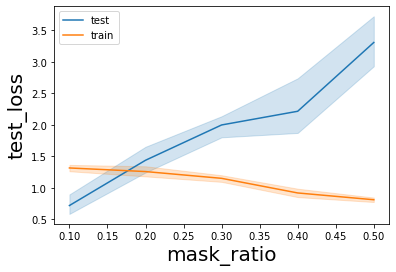

In [59]:
g=sns.lineplot(x='mask_ratio',y='test_loss',data=reg_pars_and_loss_df,label='test')
g=sns.lineplot(x='mask_ratio',y='train_loss',data=reg_pars_and_loss_df,label='train')

# g.set(xscale='log')



In [49]:
fn='/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/gm_fit/test_cv/ind_0_ch_0_sweep.p'
# reg_pars_and_loss_df.to_pickle(fn)
reg_pars_and_loss_df = pd.read_pickle(fn)


In [50]:
reg_pars_and_loss_df.groupby(['g_sigma','g_mu','g_w','nfields']).mean().sort_values('test_loss',ascending=True).head(10)



test_loss  train_loss
g_sigma g_mu  g_w     nfields                       
1       1.0   10000   4         3.260070    1.346327
                      3         3.886261    1.560592
              100     4         3.940150    2.459316
                      3         3.977803    2.715869
        0.1   10000   4         4.231650    1.705288
        100.0 10000   2         4.337270    1.208175
        0.1   100     4         4.373140    2.939638
100     100.0 1000000 2         4.581542    1.118856
1       100.0 10000   4         4.604978    0.626569
                      3         4.613732    0.811102

In [56]:
reg_pars_and_loss_df.query('g_w==1000000&g_sigma==1000000&')

,g_sigma,g_mu,g_w,nfields,test_loss,train_loss
99,1000000,0.1,1000000,2,7.518442,5.373024
103,1000000,1.0,1000000,2,6.371908,5.215038
107,1000000,100.0,1000000,2,8.055758,0.964709
111,1000000,10000.0,1000000,2,7.365654,0.932136
115,1000000,0.1,1000000,3,10.481826,2.383162
...,...,...,...,...,...,...
1423,1000000,10000.0,1000000,3,8.814052,0.446766
1427,1000000,0.1,1000000,4,6.897724,1.360728
1431,1000000,1.0,1000000,4,5.475342,1.051098
1435,1000000,100.0,1000000,4,5.989578,0.424417


In [58]:
reg_pars_and_loss_df_mean = reg_pars_and_loss_df.groupby(['g_w','g_sigma','g_mu','nfields']).mean()


In [68]:
reg_pars_and_loss_df_mean.loc[1000000,1000000,10000]

,test_loss,train_loss
nfields,,
2,6.649480,1.015840
3,8.675369,0.613738
4,8.113226,0.432242


In [51]:
reg_pars_and_loss_df.groupby(['g_sigma','g_mu','g_w','nfields']).mean().sort_values('test_loss',ascending=False).head(10)



test_loss  train_loss
g_sigma g_mu    g_w   nfields                       
1000000 10000.0 100   3        13.296546    1.061323
10000   10000.0 100   3        13.135372    1.065274
1000000 10000.0 10000 3        12.131845    0.741579
        0.1     10000 3        11.838120    2.658262
10000   10000.0 10000 3        11.484641    0.741799
1000000 10000.0 100   4        11.467019    0.748274
        100.0   100   3        11.117047    1.104611
10000   10000.0 100   4        10.941745    0.744664
                      2        10.767611    1.526829
1000000 0.1     100   3        10.764624    3.347351

In [24]:
reg_pars_and_loss_df.sort_values('test_loss').head(10)

,g_sigma,g_mu,g_w,nfields,test_loss,train_loss
792,1,100.0,10000,3,1.348386,0.800964
840,1,100.0,1000000,3,1.556361,0.754418
860,1,10000.0,1000000,4,1.557475,0.542940
844,1,10000.0,1000000,3,1.629331,0.827059
252,1,10000.0,1000000,2,1.673840,1.185599
824,1,100.0,1000000,2,1.706067,1.203602
861,100,10000.0,1000000,4,1.723982,0.538365
776,1,100.0,10000,2,1.724061,1.258425
852,1,1.0,1000000,4,1.735256,1.370494
856,1,100.0,1000000,4,1.756356,0.684998


In [32]:
# reg_pars_and_loss_df.groupby(['nfields','g_w'])['test_loss'].mean().unstack()
# reg_pars_and_loss_df.groupby(['nfields','g_mu'])['test_loss'].mean().unstack()
reg_pars_and_loss_df.groupby(['nfields','g_sigma'])['test_loss'].mean().unstack()

g_sigma,1,100,10000,1000000
nfields,,,,
2,5.704248,6.637870,7.532573,7.803964
3,6.239429,7.158298,9.243749,9.817541
4,5.230411,6.037124,7.672308,8.118136


In [35]:
reg_pars_and_loss_df.groupby(['nfields','g_w'])['test_loss'].sem().unstack()*1.96
# reg_pars_and_loss_df.groupby(['nfields','g_mu'])['test_loss'].sem().unstack()

g_w,100,10000,1000000
nfields,,,
2,0.469121,0.495204,0.371608
3,0.558351,0.654263,0.493191
4,0.569944,0.501804,0.394555


<AxesSubplot:xlabel='nfields', ylabel='g_mu'>

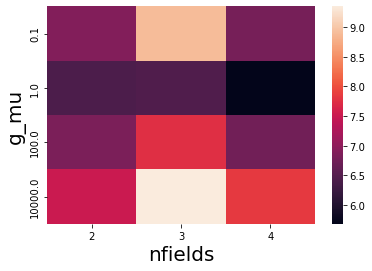

In [84]:
im=reg_pars_and_loss_df_mean['test_loss'].groupby(['g_mu','nfields'],axis=0).mean().unstack()
sns.heatmap(im)

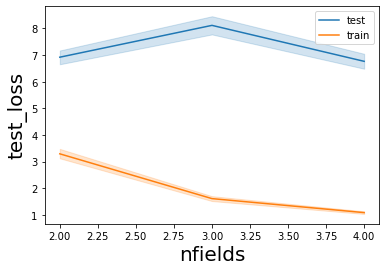

In [36]:
g=sns.lineplot(x='nfields',y='test_loss',data=reg_pars_and_loss_df,label='test')
g=sns.lineplot(x='nfields',y='train_loss',data=reg_pars_and_loss_df,label='train')




[None]

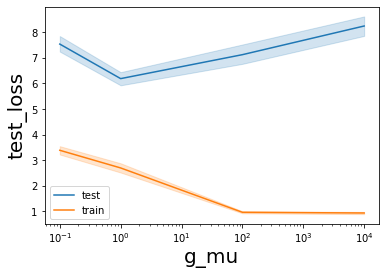

In [37]:
g=sns.lineplot(x='g_mu',y='test_loss',data=reg_pars_and_loss_df,label='test')
g=sns.lineplot(x='g_mu',y='train_loss',data=reg_pars_and_loss_df,label='train')

g.set(xscale='log')


[None]

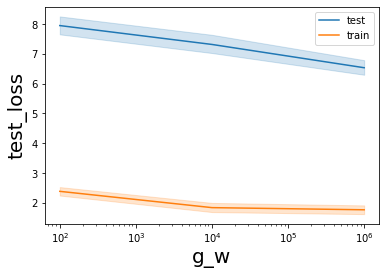

In [34]:
g=sns.lineplot(x='g_w',y='test_loss',data=reg_pars_and_loss_df,label='test')
g=sns.lineplot(x='g_w',y='train_loss',data=reg_pars_and_loss_df,label='train')

g.set(xscale='log')



[None]

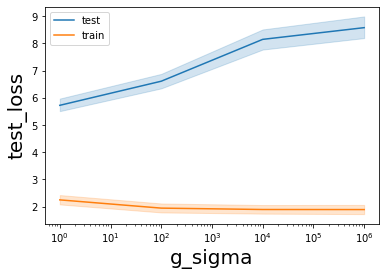

In [38]:
g=sns.lineplot(x='g_sigma',y='test_loss',data=reg_pars_and_loss_df,label='test')
g=sns.lineplot(x='g_sigma',y='train_loss',data=reg_pars_and_loss_df,label='train')

g.set(xscale='log')



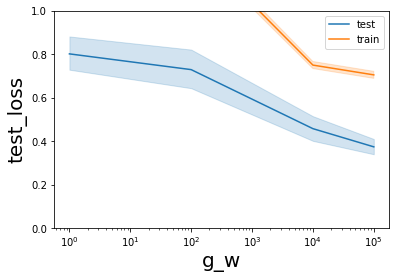

In [36]:
g.figure

In [11]:
reload(gm)

<module 'gm' from '/mnt/home/szheng/projects/util_code/gm.py'>

In [23]:
def hyperparam_loss(ys_l,reg_pars_,nfields=1,mask=None,niters=1):
    pars_learned,loss_l,test_loss=gm.train_and_test(ys_l,regressors_={},reg_type = 'quad_variation',reg_pars_=reg_pars_,nfields=nfields,mask=mask,loss_type='mse',niters=niters)
    return test_loss
    




In [35]:
mask = gm.get_train_test_mask(ys_l.shape[0],ys_l.shape[1],0.2)
# grad()

In [43]:
grad(hyperparam_loss,1)(ys_l,{'g_mu':1.},nfields=1,mask=mask,niters=1000)

{'g_mu': DeviceArray(0.00569999, dtype=float32, weak_type=True)}

In [15]:
ys_l = fr_map_trial[0][0]
hyperparam_loss(ys_l,reg_pars_={'g_mu':1},nfields=1,mask=mask)

({'S': DeviceArray([[0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               ...,
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.],
               [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
  'b': DeviceArray([1.2540551, 4.786852 , 4.286772 , 2.6818516, 3.169293 ,
               2.8062375, 4.347058 , 4.8698807, 4.2833548, 3.548306 ,
               1.9012144, 3.4281504, 3.4430466, 1.4900964, 2.8304272,
               2.0054557, 5.967971 , 2.974938 , 3.5830262, 5.2252812,
               4.3168783], dtype=float32),
  'logsigmas': DeviceArray([[22.296942 ],
               [22.466887 ],
               [22.861826 ],
               [23.562916 ],
               [24.304224 ],
               [25.09307  ],
               [25.992403 ],
               [26.072489 ],
               [21.972134 ],
               [17.955658 ],
               [13.965198 ],
               [ 9.974

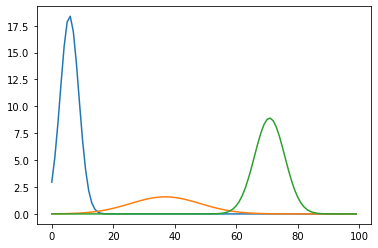

In [30]:
xs=np.arange(100)
k=0
for k in range(pars_learned['mus'].shape[1]):
    plt.plot(pars_learned['ws'][-1,k]*scipy.stats.norm.pdf(xs,loc=pars_learned['mus'][-1,k],scale=pars_learned['sigmas'][-1,k]))

